# **ANALYZE BANK MARKETTING DATA**


*   FEATURES:     bold text
 0  age     
 1   job     
 2   marital      
 3   education  
 4   default    
 5   balance
 6   housing    
 7   loan       
 8   contact    
 9   day        
 10  month      
 11  duration   
 12  campaign   
 14  previous    
 15  poutcome   

*   LABEL:  DEPOSIT







**IMPORT** **LIBRARIES**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#create dataframe to read data set
df = pd.read_csv('bank.csv')

In [ ]:
df.head(15)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
5,42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes
6,56,management,married,tertiary,no,830,yes,yes,unknown,6,may,1201,1,-1,0,unknown,yes
7,60,retired,divorced,secondary,no,545,yes,no,unknown,6,may,1030,1,-1,0,unknown,yes
8,37,technician,married,secondary,no,1,yes,no,unknown,6,may,608,1,-1,0,unknown,yes
9,28,services,single,secondary,no,5090,yes,no,unknown,6,may,1297,3,-1,0,unknown,yes


**READING DATA**

In [ ]:
# check the df structe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [ ]:
# find the number of rows and column
df.shape

(11162, 17)

In [ ]:
# describe df numerical columns
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [ ]:
for clm in df.select_dtypes(include='object').columns:
    print(clm)
    print(df[clm].unique())

job
['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']
marital
['married' 'single' 'divorced']
education
['secondary' 'tertiary' 'primary' 'unknown']
default
['no' 'yes']
housing
['yes' 'no']
loan
['no' 'yes']
contact
['unknown' 'cellular' 'telephone']
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome
['unknown' 'other' 'failure' 'success']
deposit
['yes' 'no']


#DATA ANALYSIS

FINDING UNWANTED DATA IN GIVEN DATASET.ipynb(COLUMNS)


*  OUTCOME:There is no unwanted columns










FINDING MISSING VALUE

>no ‘NULL’ values, however, found ‘unknown’ values

In [ ]:
# find missing values
features_na = [features for features in df.columns if df[features].isnull().sum() > 0]
for feature in features_na:
    print(feature, np.round(df[feature].isnull().mean(), 4),  ' % missing values')
else:
    print("No missing value found")

No missing value found


FEATURES WITH ONE VALUE

In [ ]:
# find features with one value
for column in df.columns:
    print(column,df[column].nunique())

age 76
job 12
marital 3
education 4
default 2
balance 3805
housing 2
loan 2
contact 3
day 31
month 12
duration 1428
campaign 36
pdays 472
previous 34
poutcome 4
deposit 2


OUTCOME: found none

EXPLORING CATEGORICAL FEATURES

In [ ]:
categorical_features=[feature for feature in df.columns if ((df[feature].dtypes=='O') & (feature not in ['deposit']))]
categorical_features

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [ ]:
for feature in categorical_features:
    print('Feature: {} & No of categories: {}'.format(feature,len(df[feature].unique())))

Feature: job & No of categories: 12
Feature: marital & No of categories: 3
Feature: education & No of categories: 4
Feature: default & No of categories: 2
Feature: housing & No of categories: 2
Feature: loan & No of categories: 2
Feature: contact & No of categories: 3
Feature: month & No of categories: 12
Feature: poutcome & No of categories: 4


OUTCOME: 9 categorical features with job and month having highest no of categorical values(12)

1.   client with job type as management records are high in given dataset and housemaid are very less
2. client who married are high in records in given dataset and divorced are less
3. client whoes education background is secondary are in high numbers in given dataset
4. defualt feature seems to be does not play importand role as it has value of no at high ratio to value yes which can drop
5. data in month of may is high and less in dec



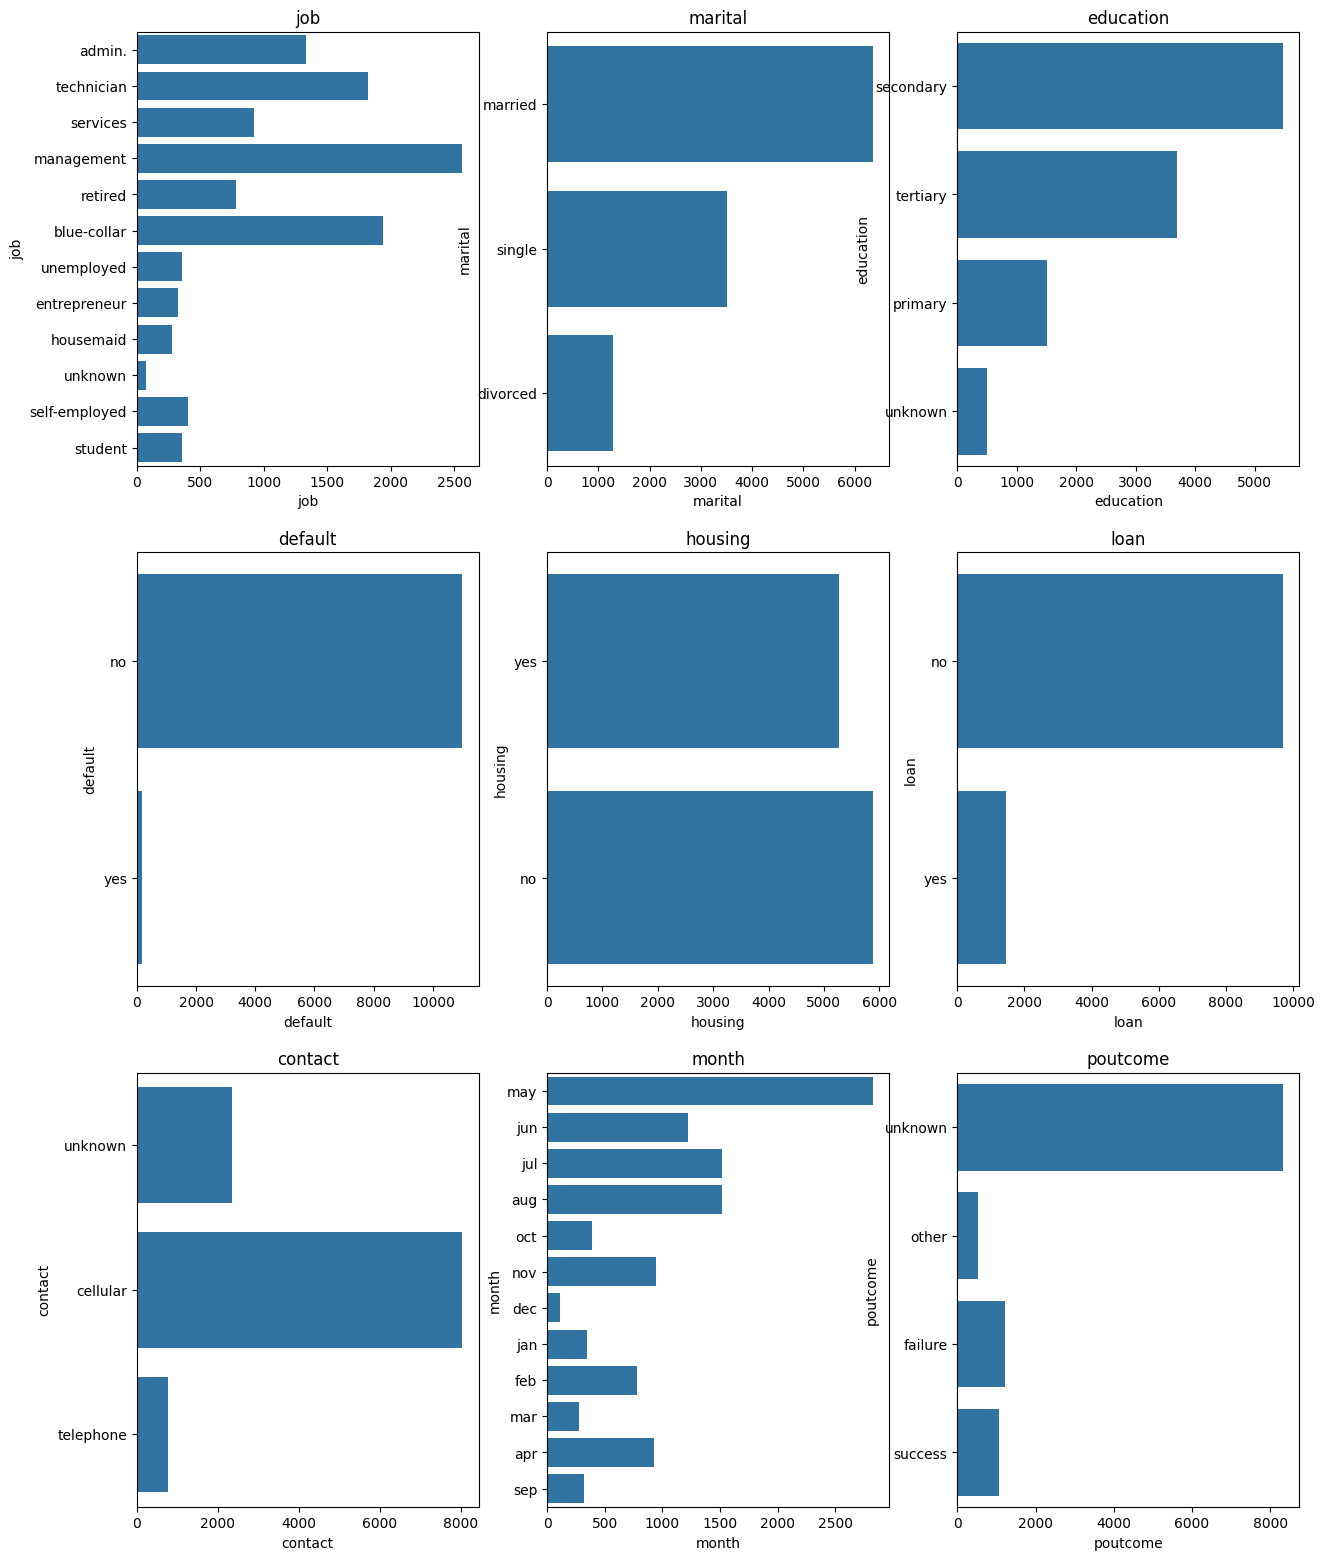

In [ ]:
# Import the matplotlib.pyplot module and alias it as plt
import matplotlib.pyplot as plt

#check count based on categorical features
plt.figure(figsize=(15,80), facecolor='white')
plotnumber =1
for categorical_feature in categorical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.countplot(y=categorical_feature,data=df)
    plt.xlabel(categorical_feature)
    plt.title(categorical_feature)
    plotnumber+=1
plt.show()

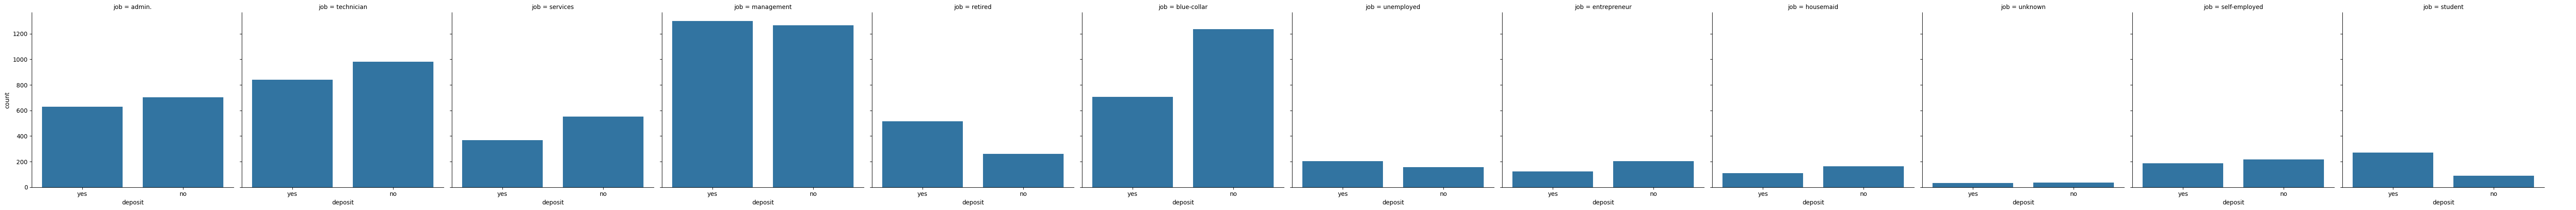

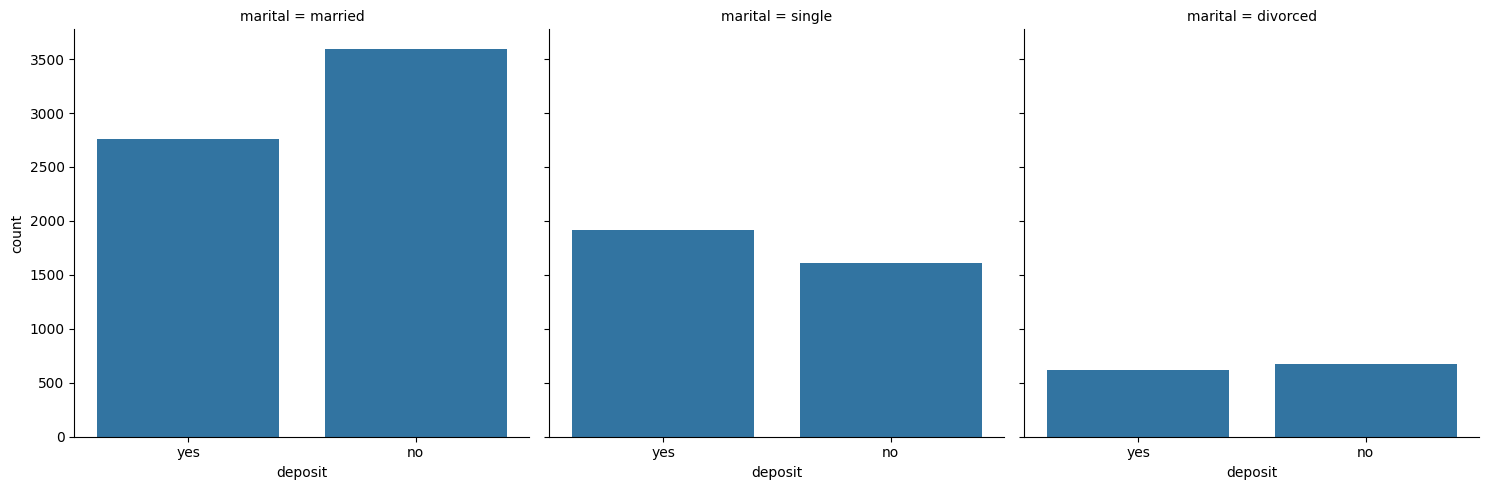

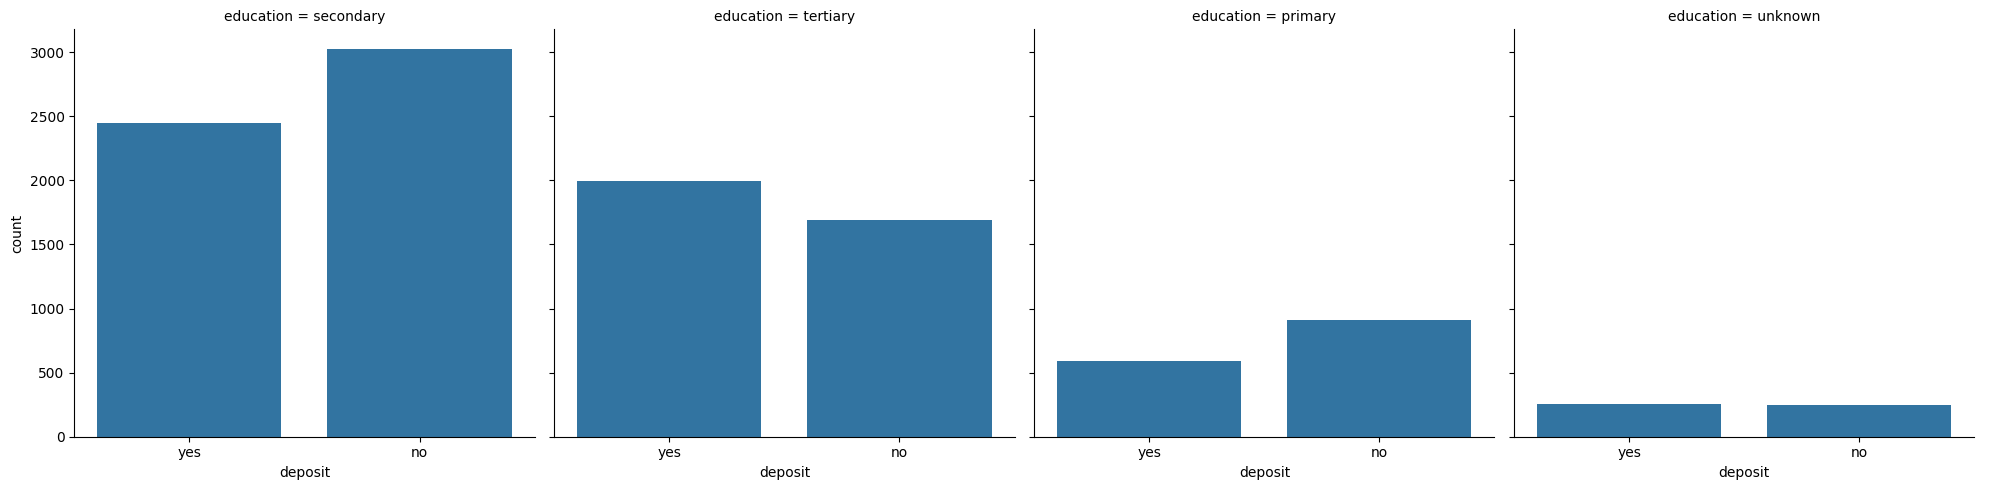

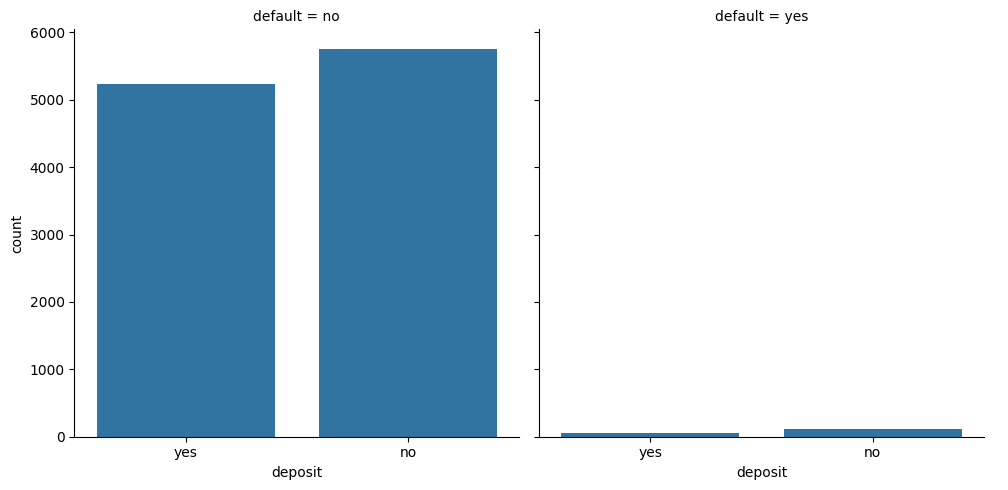

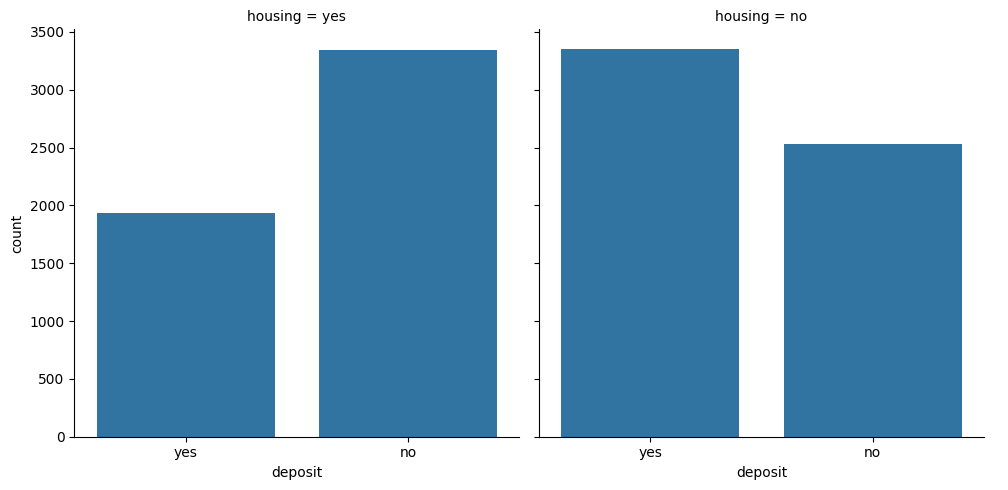

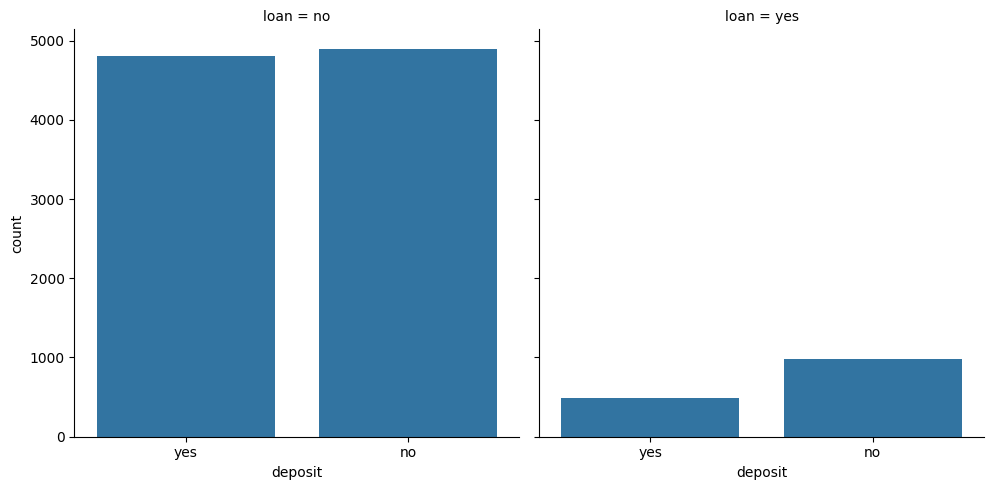

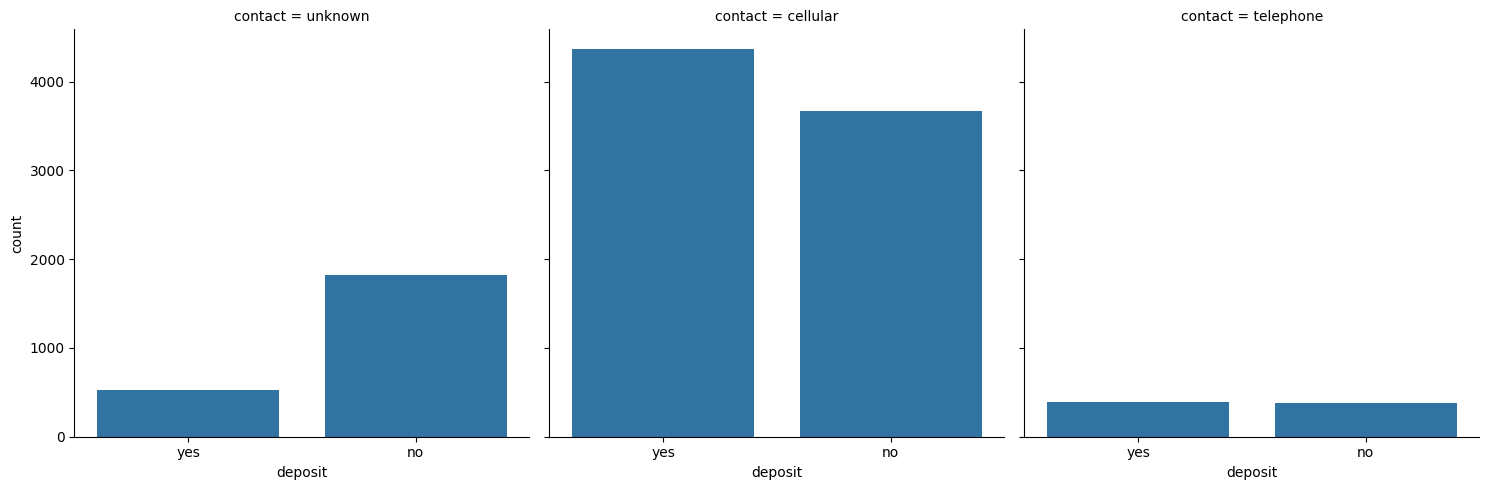

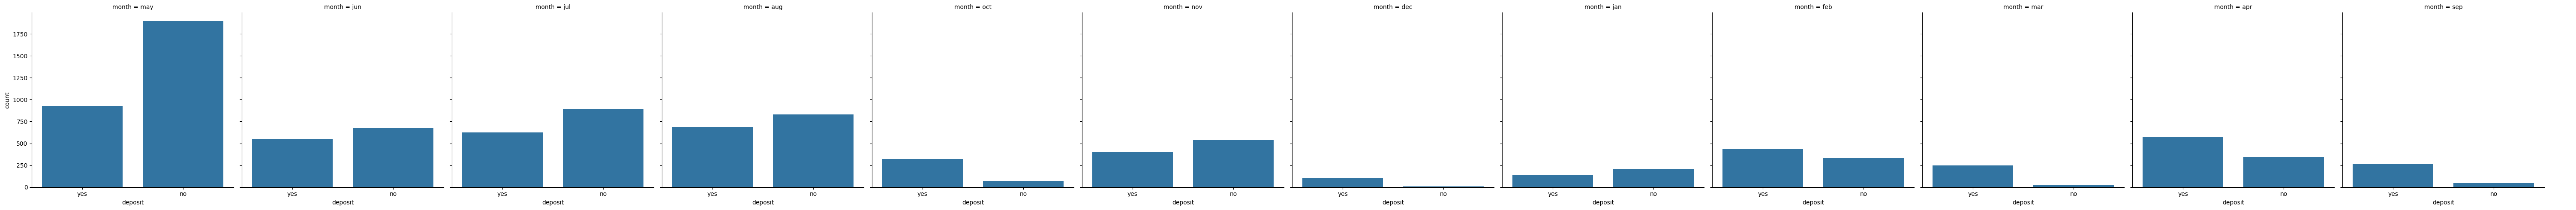

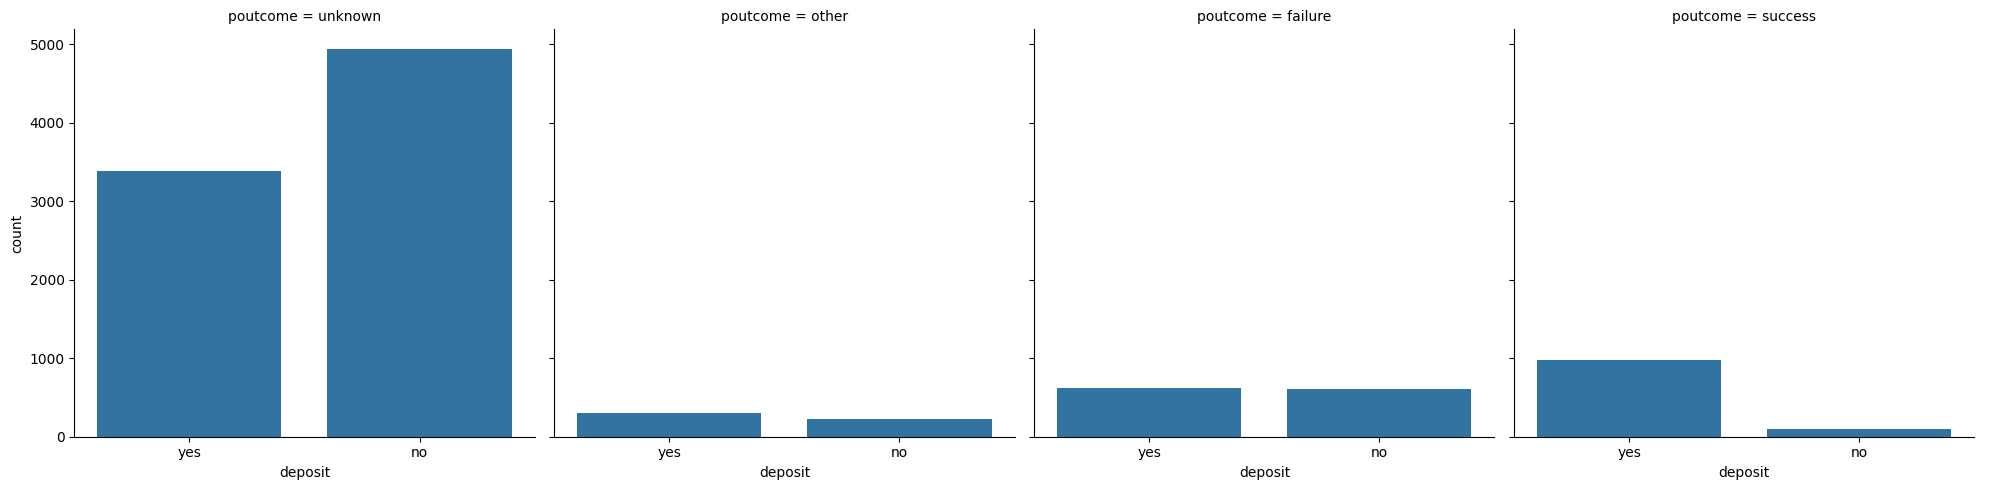

In [ ]:
#check target label split over categorical features
#Find out the relationship between categorical variable and dependent variable
for categorical_feature in categorical_features:
    sns.catplot(x='deposit', col=categorical_feature, kind='count', data= df)
plt.show()

In [ ]:
#Check target label split over categorical features and find the count
for categorical_feature in categorical_features:
    print(df.groupby(['deposit',categorical_feature]).size())

deposit  job          
no       admin.            703
         blue-collar      1236
         entrepreneur      205
         housemaid         165
         management       1265
         retired           262
         self-employed     218
         services          554
         student            91
         technician        983
         unemployed        155
         unknown            36
yes      admin.            631
         blue-collar       708
         entrepreneur      123
         housemaid         109
         management       1301
         retired           516
         self-employed     187
         services          369
         student           269
         technician        840
         unemployed        202
         unknown            34
dtype: int64
deposit  marital 
no       divorced     671
         married     3596
         single      1606
yes      divorced     622
         married     2755
         single      1912
dtype: int64
deposit  education
no       prima

OUTCOME:               
1. retired client has high interest on deposit
2. client who has housing loan seems to be not interested much on deposit
3. if pre campagin outcome that is poutcome=success then, there is high chance of client to show interest on deposit
4. in month of March, September, October and December, client show high interest to deposit
5. in month of may, records are high but client interst ratio is very less

In [ ]:
# list of numerical variables
numerical_features = [feature for feature in df.columns if ((df[feature].dtypes != 'O') & (feature not in ['deposit']))]
print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
df[numerical_features].head()

Number of numerical variables:  7


,age,balance,day,duration,campaign,pdays,previous
0,59,2343,5,1042,1,-1,0
1,56,45,5,1467,1,-1,0
2,41,1270,5,1389,1,-1,0
3,55,2476,5,579,1,-1,0
4,54,184,5,673,2,-1,0


In [ ]:
discrete_feature = [feature for feature in numerical_features if len(df[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 0


In [ ]:
continuous_features = [feature for feature in numerical_features if feature not in discrete_feature+['deposit']]
print("Continuous feature Count {}".format(len(continuous_features)))

Continuous feature Count 7


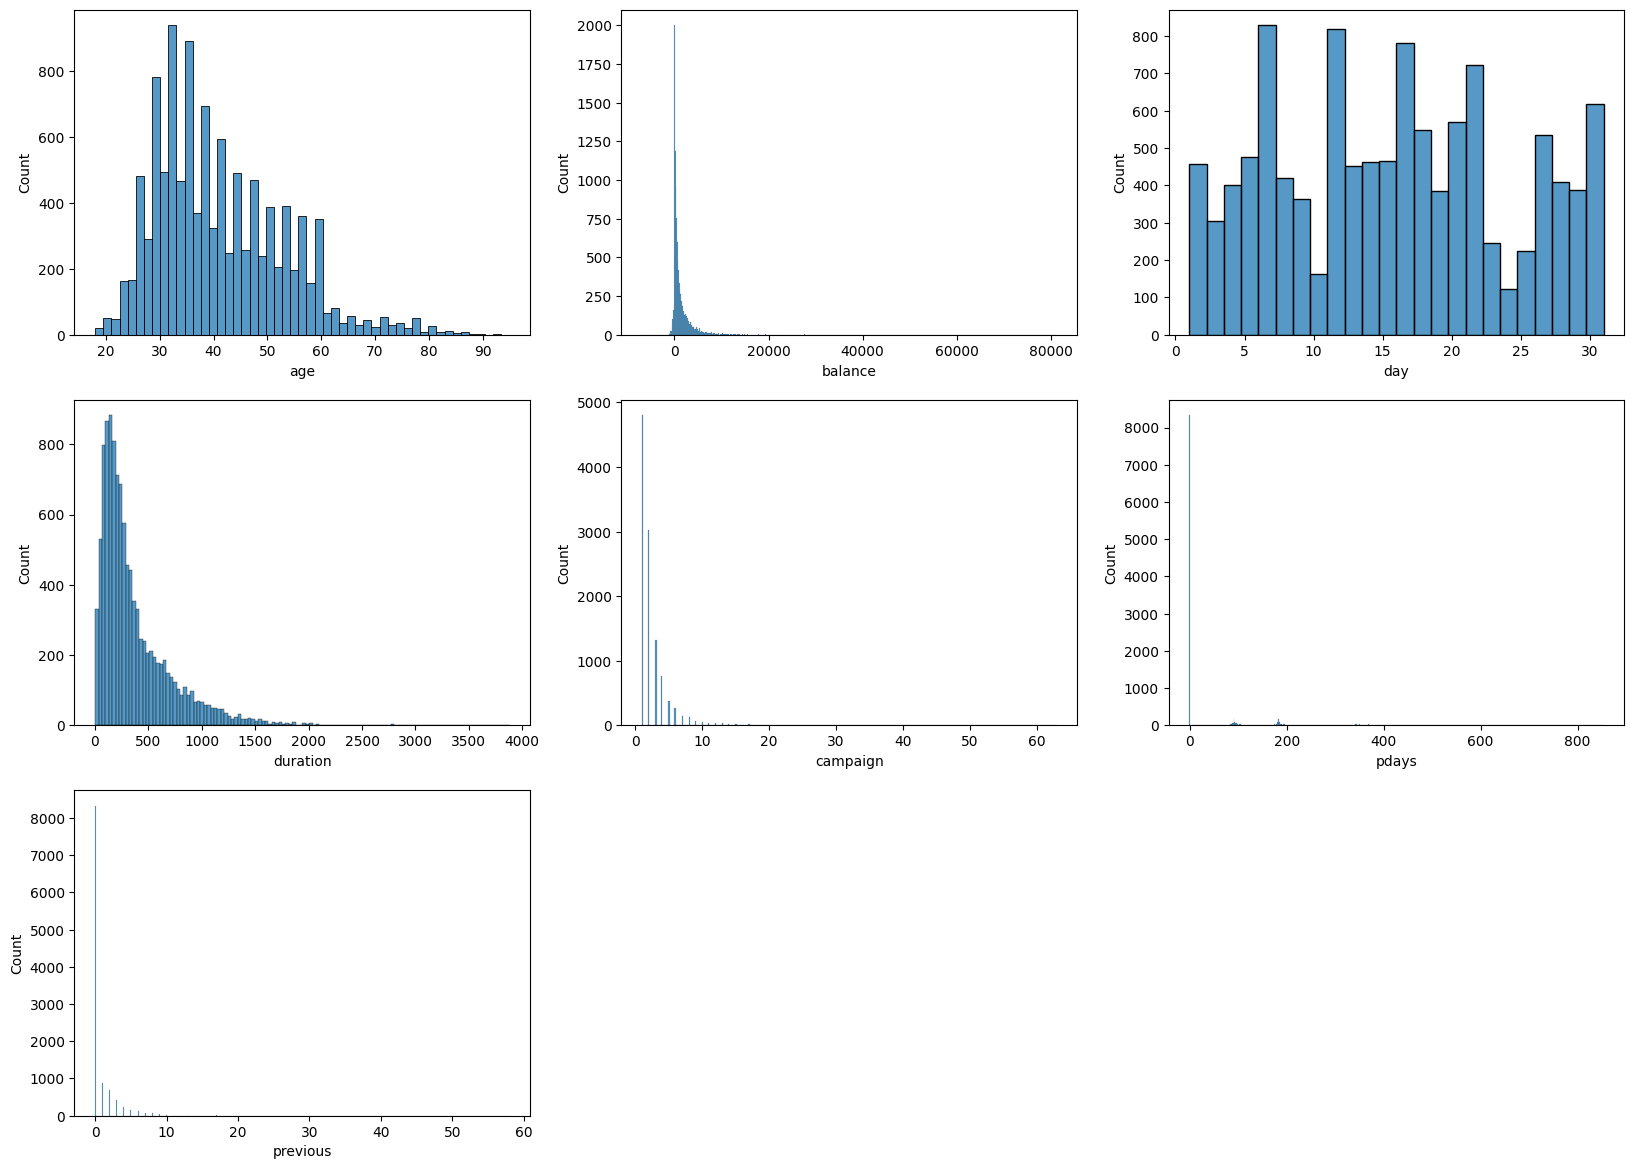

In [ ]:
#plot a univariate distribution of continues observations
plt.figure(figsize=(20,60), facecolor='white')
plotnumber = 1
for continuous_feature in continuous_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.histplot(df[continuous_feature])
    plt.xlabel(continuous_feature)
    plotnumber += 1
plt.show()

OUTCOME:
1. it seems age, days distributed normally
2. balance, duration, compaign, pdays and previous heavely skewed towards left and seems to be have some outliers.

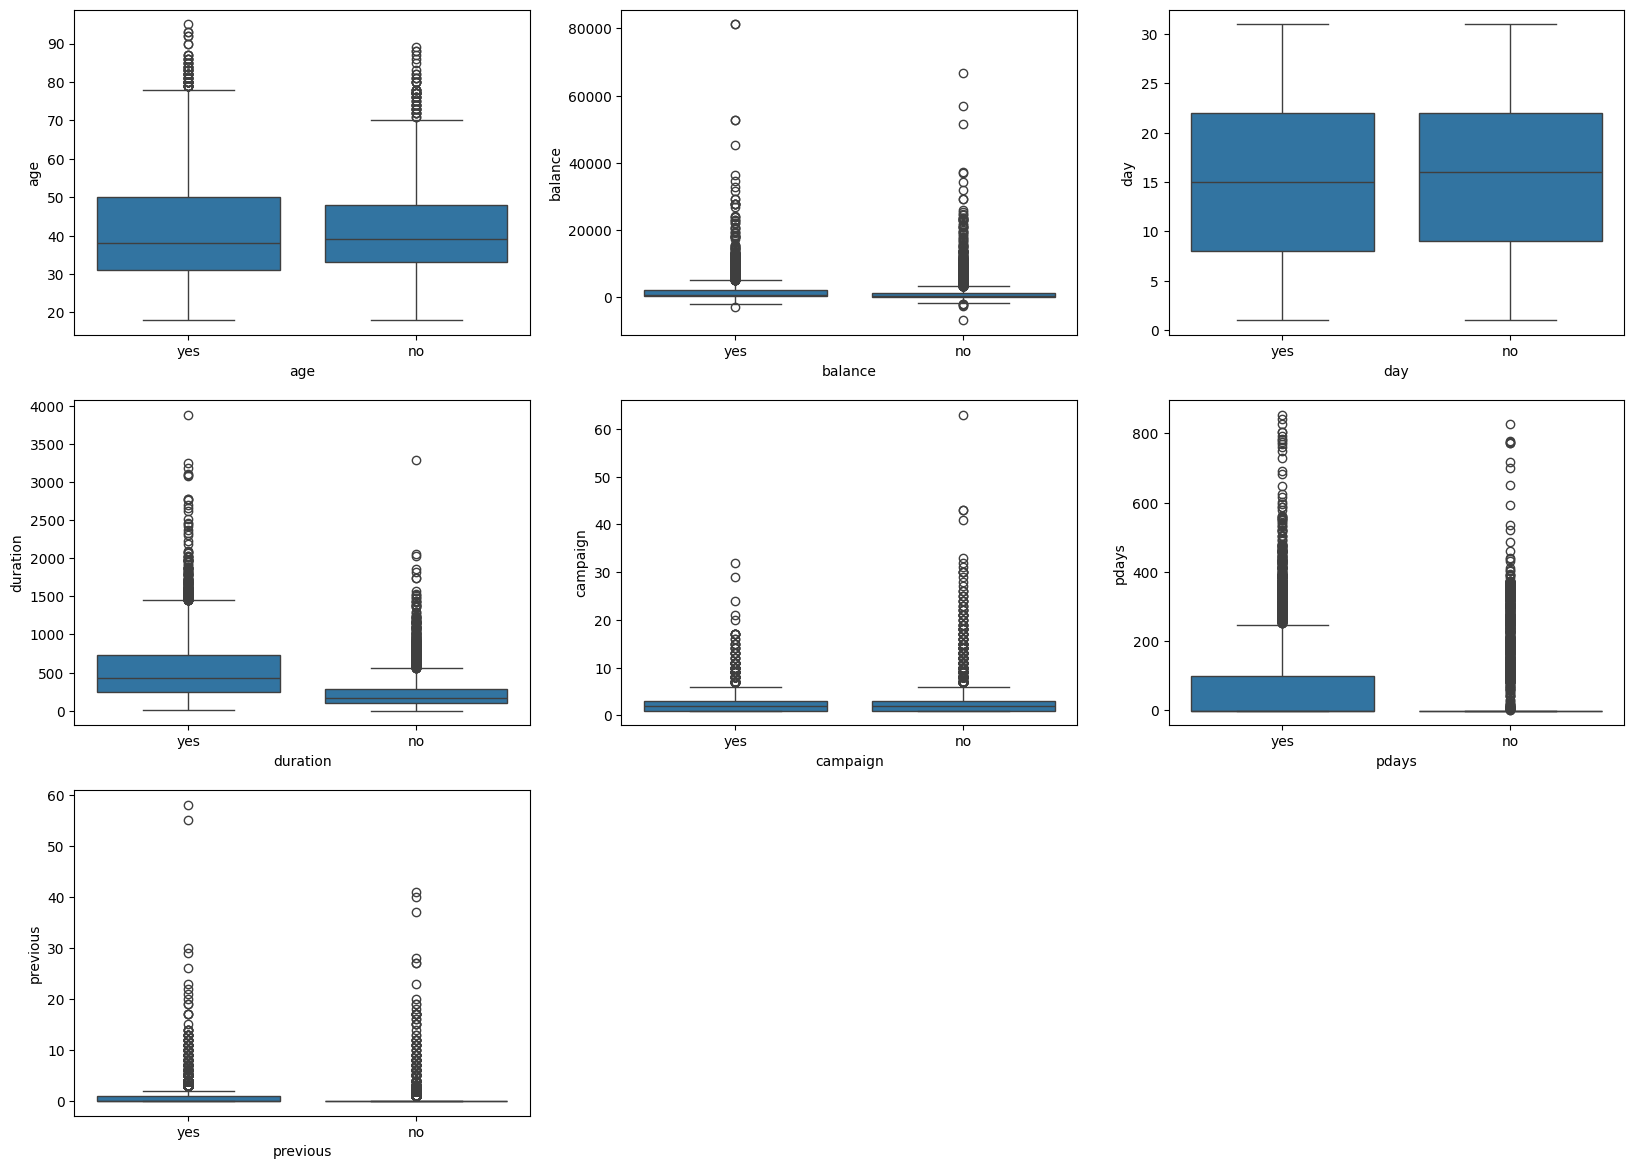

In [ ]:
#boxplot to show target distribution with respect numerical features
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for feature in continuous_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(x="deposit", y= df[feature], data=df)
    plt.xlabel(feature)
    plotnumber+=1
plt.show()

OUTCOME:
client shows interest on deposit who had discussion for longer duration

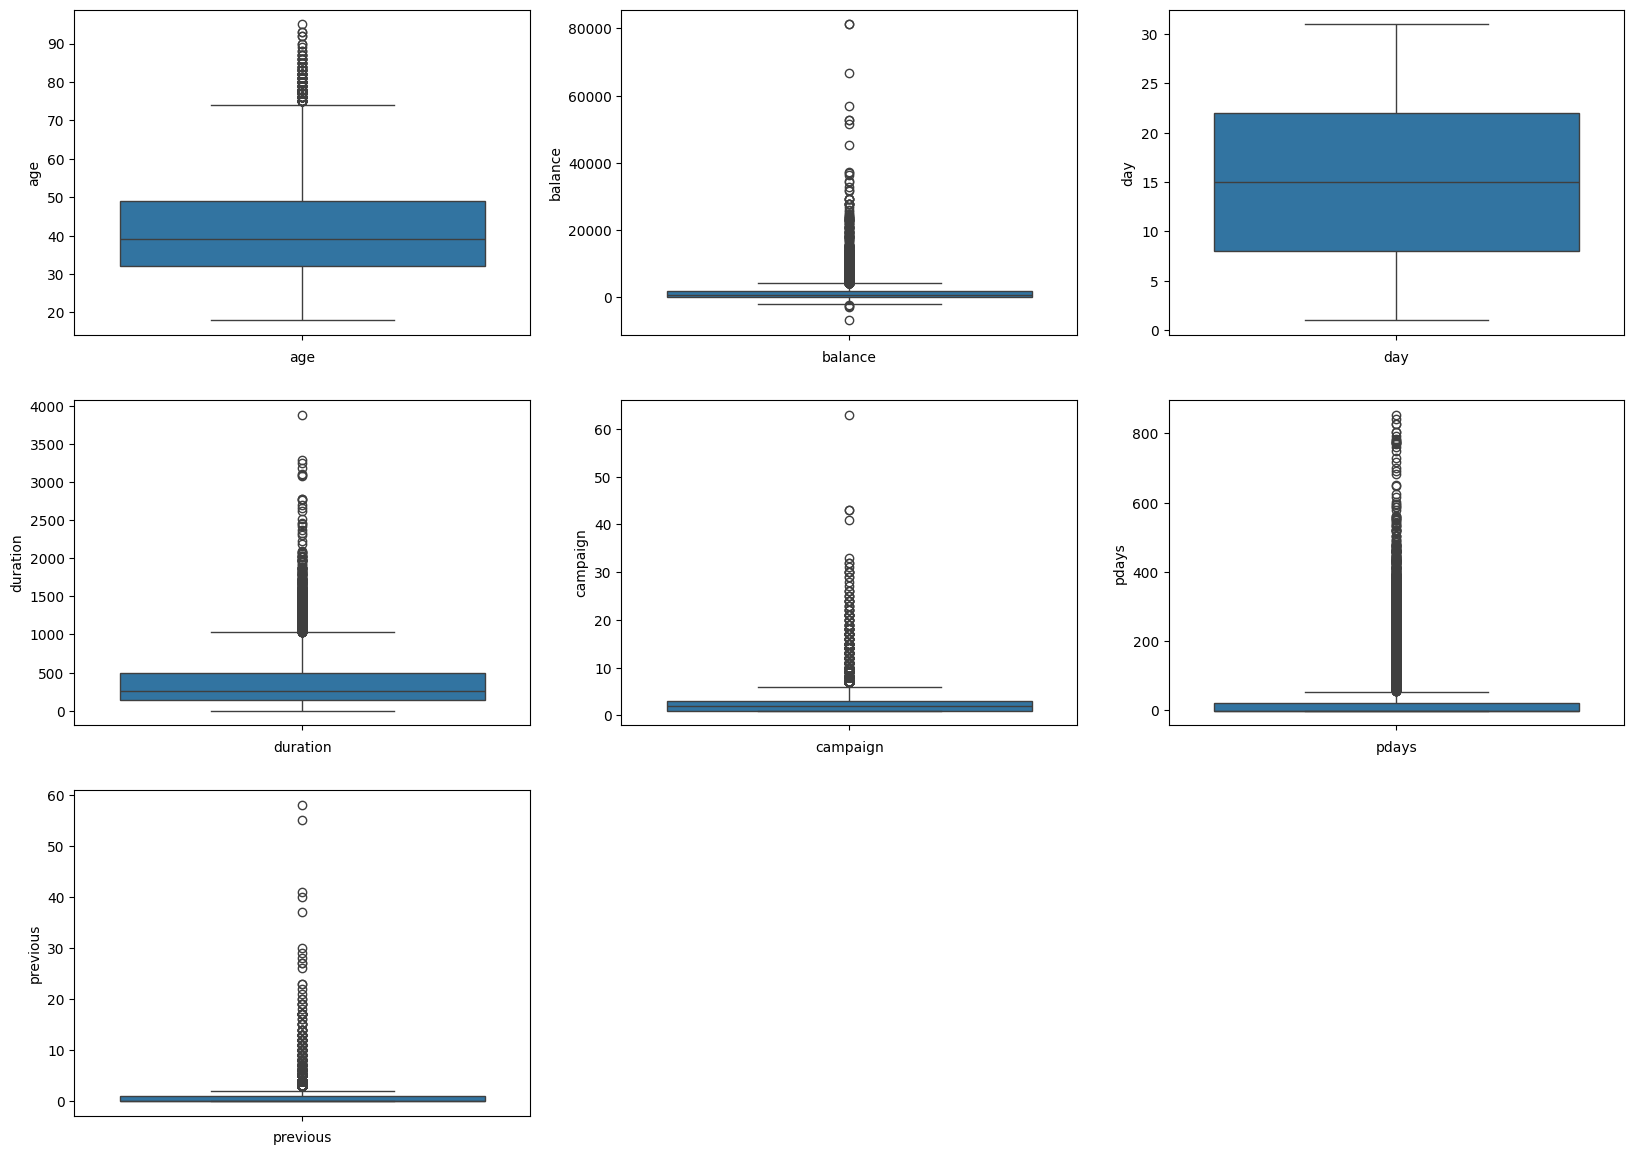

In [ ]:

#boxplot on numerical features to find outliers
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for numerical_feature in numerical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(df[numerical_feature])
    plt.xlabel(numerical_feature)
    plotnumber+=1
plt.show()

OUTCOME:         
**age, balance, duration, compaign, pdays and previous has some outliers**

<Axes: >

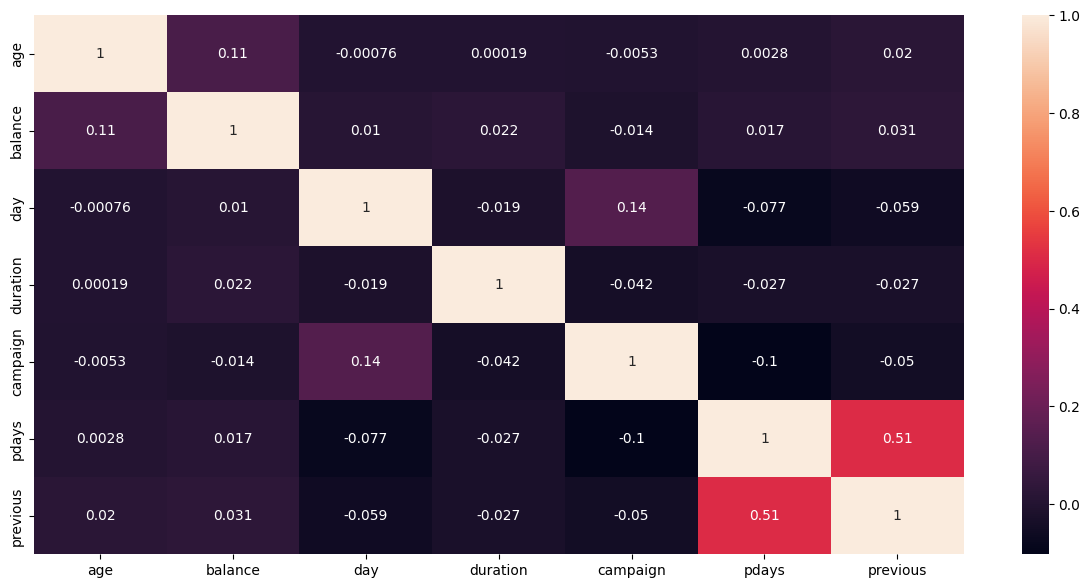

In [ ]:
#Checking for correlation
cor_mat=df.select_dtypes(include=np.number).corr() # Select only numerical columns for correlation calculation
fig = plt.figure(figsize=(15,7))
sns.heatmap(cor_mat,annot=True)

OUTCOME:    
It seems no feature is heavily correlated with other features(hence no need of combining features)

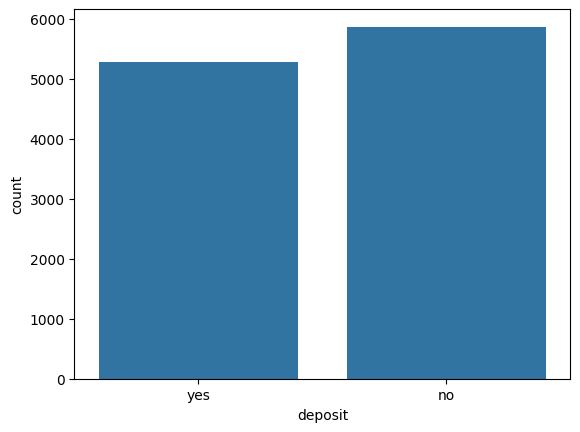

In [ ]:

sns.countplot(x='deposit',data=df)
plt.show()

OUTCOME: given dataset seems to be balanced.

#**DATA REFINING**

In [ ]:
# handling  unknown values
# Replace 'unknown' with NaN
data_cleaned = df.replace('unknown', pd.NA)

# Optionally, check how many missing values each column has
print(data_cleaned.isnull().sum())

age             0
job            70
marital         0
education     497
default         0
balance         0
housing         0
loan            0
contact      2346
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome     8326
deposit         0
dtype: int64


In [ ]:
data_cleaned = data_cleaned.dropna(thresh=len(data_cleaned.columns) - 3)

In [ ]:
for column in data_cleaned.select_dtypes(include='object').columns:
    data_cleaned[column].fillna(data_cleaned[column].mode()[0], inplace=True)

In [ ]:
data_cleaned.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,cellular,5,may,1042,1,-1,0,failure,yes
1,56,admin.,married,secondary,no,45,no,no,cellular,5,may,1467,1,-1,0,failure,yes
2,41,technician,married,secondary,no,1270,yes,no,cellular,5,may,1389,1,-1,0,failure,yes
3,55,services,married,secondary,no,2476,yes,no,cellular,5,may,579,1,-1,0,failure,yes
4,54,admin.,married,tertiary,no,184,no,no,cellular,5,may,673,2,-1,0,failure,yes


In [ ]:
data_cleaned.groupby(['deposit','default']).size()

deposit  default
no       no         5753
         yes         115
yes      no         5236
         yes          52
dtype: int64

95% of deposit is 'no' irrespective of default value: hence removed default

cleaning **data**

default has little to no significance over deposit (removal of overfitting)

In [ ]:
data_cleaned.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,cellular,5,may,1042,1,-1,0,failure,yes
1,56,admin.,married,secondary,no,45,no,no,cellular,5,may,1467,1,-1,0,failure,yes
2,41,technician,married,secondary,no,1270,yes,no,cellular,5,may,1389,1,-1,0,failure,yes
3,55,services,married,secondary,no,2476,yes,no,cellular,5,may,579,1,-1,0,failure,yes
4,54,admin.,married,tertiary,no,184,no,no,cellular,5,may,673,2,-1,0,failure,yes


In [ ]:
data_cleaned.groupby(['deposit','pdays']).size()

deposit  pdays
no       -1       4935
          1          2
          2          6
          5          2
          6          2
                  ... 
yes       804        1
          805        1
          828        1
          842        1
          854        1
Length: 732, dtype: int64

In [ ]:
# drop pdays as it has -1 value for around 40%+
data_cleaned.drop(['pdays'],axis=1, inplace=True)

In [ ]:
# remove outliers in feature age...
data_cleaned.groupby('age',sort=True)['age'].count()
# these can be ignored and values lies in between 18 to 95

,age
age,
18,8
19,13
20,20
21,30
22,48
...,...
89,1
90,2
92,2


In [ ]:
# remove outliers in feature balance...
data_cleaned.groupby(['deposit','balance'],sort=True)['balance'].count()
# these outlier should not be remove as balance goes high, client show interest on deposit

deposit  balance
no       -6847      1
         -2712      1
         -2282      1
         -2049      1
         -1965      1
                   ..
yes       34646     1
          36252     1
          45248     1
          52587     2
          81204     2
Name: balance, Length: 5080, dtype: int64

In [ ]:
# remove outliers in feature duration...
data_cleaned.groupby(['deposit','duration'],sort=True)['duration'].count()
# these outlier should not be remove as duration goes high, client show interest on deposit

deposit  duration
no       2           1
         3           1
         4           2
         5           4
         6           6
                    ..
yes      3094        1
         3102        1
         3183        1
         3253        1
         3881        1
Name: duration, Length: 2157, dtype: int64

In [ ]:
# remove outliers in feature campaign...
data_cleaned.groupby(['deposit','campaign'],sort=True)['campaign'].count()

deposit  campaign
no       1           2235
         2           1626
         3            702
         4            454
         5            239
         6            173
         7             92
         8             95
         9             51
         10            38
         11            24
         12            25
         13            24
         14            11
         15             9
         16             7
         17             8
         18             8
         19             5
         20             4
         21             7
         22             4
         23             3
         24             4
         25             3
         26             3
         27             1
         28             1
         29             1
         30             4
         31             1
         32             1
         33             1
         41             1
         43             2
         63             1
yes      1           2560
         2           1401
         3            618
         4            317
         5            139
         6             92
         7             47
         8             32
         9             21
         10            14
         11            16
         12             4
         13             6
         14             4
         15             4
         16             2
         17             6
         20             1
         21             1
         24             1
         29             1
         32             1
Name: campaign, dtype: int64

In [ ]:
df3 = data_cleaned[data_cleaned['campaign'] < 33]

In [ ]:
df3.groupby(['deposit','campaign'],sort=True)['campaign'].count()

deposit  campaign
no       1           2235
         2           1626
         3            702
         4            454
         5            239
         6            173
         7             92
         8             95
         9             51
         10            38
         11            24
         12            25
         13            24
         14            11
         15             9
         16             7
         17             8
         18             8
         19             5
         20             4
         21             7
         22             4
         23             3
         24             4
         25             3
         26             3
         27             1
         28             1
         29             1
         30             4
         31             1
         32             1
yes      1           2560
         2           1401
         3            618
         4            317
         5            139
         6             92
         7             47
         8             32
         9             21
         10            14
         11            16
         12             4
         13             6
         14             4
         15             4
         16             2
         17             6
         20             1
         21             1
         24             1
         29             1
         32             1
Name: campaign, dtype: int64

In [ ]:
df3.groupby(['deposit','campaign'],sort=True)['campaign'].count()

deposit  campaign
no       1           2235
         2           1626
         3            702
         4            454
         5            239
         6            173
         7             92
         8             95
         9             51
         10            38
         11            24
         12            25
         13            24
         14            11
         15             9
         16             7
         17             8
         18             8
         19             5
         20             4
         21             7
         22             4
         23             3
         24             4
         25             3
         26             3
         27             1
         28             1
         29             1
         30             4
         31             1
         32             1
yes      1           2560
         2           1401
         3            618
         4            317
         5            139
         6             92
         7             47
         8             32
         9             21
         10            14
         11            16
         12             4
         13             6
         14             4
         15             4
         16             2
         17             6
         20             1
         21             1
         24             1
         29             1
         32             1
Name: campaign, dtype: int64

In [ ]:
df4 = df3.copy()

In [ ]:

df4 = df4[df4['previous'] < 31]

In [ ]:
df4.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,cellular,5,may,1042,1,0,failure,yes
1,56,admin.,married,secondary,no,45,no,no,cellular,5,may,1467,1,0,failure,yes
2,41,technician,married,secondary,no,1270,yes,no,cellular,5,may,1389,1,0,failure,yes
3,55,services,married,secondary,no,2476,yes,no,cellular,5,may,579,1,0,failure,yes
4,54,admin.,married,tertiary,no,184,no,no,cellular,5,may,673,2,0,failure,yes


In [ ]:
# Replace 'path/to' with an existing directory. For example, to save in the current directory:
df4.to_csv('cleaned_bank1.csv', index=False)

# Or to save in a specific directory, make sure it exists:
!mkdir -p /path/to/your/directory
df4.to_csv('/path/to/your/directory/cleaned_bank1.csv', index=False)

In [ ]:
cat_columns = ['job', 'marital', 'education', 'contact', 'month']
for col in  cat_columns:
    df4 = pd.concat([df4.drop(col, axis=1),pd.get_dummies(df4[col], prefix=col, prefix_sep='_',drop_first=True, dummy_na=False)], axis=1)

In [ ]:
df5=df4.copy()

In [ ]:
df5.head()

,age,default,balance,housing,loan,day,duration,campaign,previous,poutcome,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,59,no,2343,yes,no,5,1042,1,0,failure,...,False,False,False,False,False,False,True,False,False,False
1,56,no,45,no,no,5,1467,1,0,failure,...,False,False,False,False,False,False,True,False,False,False
2,41,no,1270,yes,no,5,1389,1,0,failure,...,False,False,False,False,False,False,True,False,False,False
3,55,no,2476,yes,no,5,579,1,0,failure,...,False,False,False,False,False,False,True,False,False,False
4,54,no,184,no,no,5,673,2,0,failure,...,False,False,False,False,False,False,True,False,False,False


In [ ]:
df3.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,cellular,5,may,1042,1,0,failure,yes
1,56,admin.,married,secondary,no,45,no,no,cellular,5,may,1467,1,0,failure,yes
2,41,technician,married,secondary,no,1270,yes,no,cellular,5,may,1389,1,0,failure,yes
3,55,services,married,secondary,no,2476,yes,no,cellular,5,may,579,1,0,failure,yes
4,54,admin.,married,tertiary,no,184,no,no,cellular,5,may,673,2,0,failure,yes


In [ ]:
# Replace 'path/to' with an existing directory. For example, to save in the current directory:
df3.to_csv('cleaned_bank2.csv', index=False)

# Or to save in a specific directory, make sure it exists:
!mkdir -p /path/to/your/directory
df3.to_csv('/path/to/your/directory/cleaned_bank2.csv', index=False)

# **Bank Marketing: Forecasting Customer Responses for Smarter Campaigns**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings("ignore")

In [ ]:
from io import DEFAULT_BUFFER_SIZE
DEFAULT_BUFFER_SIZE= pd.read_csv ('cleaned_bank1.csv')

In [ ]:
dff = pd.read_csv ('cleaned_bank1.csv')

In [ ]:
df1=dff.copy()

In [ ]:
print(df1.head().T)
X = df1.drop(['deposit_new'], axis=1)  # Drop the target column
y = df1['deposit_new']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

                         0      1      2      3      4
age                     59     56     41     55     54
balance               2343     45   1270   2476    184
day                      5      5      5      5      5
duration              1042   1467   1389    579    673
campaign                 1      1      1      1      2
previous                 0      0      0      0      0
job_blue-collar      False  False  False  False  False
job_entrepreneur     False  False  False  False  False
job_housemaid        False  False  False  False  False
job_management       False  False  False  False  False
job_retired          False  False  False  False  False
job_self-employed    False  False  False  False  False
job_services         False  False  False   True  False
job_student          False  False  False  False  False
job_technician       False  False   True  False  False
job_unemployed       False  False  False  False  False
marital_married       True   True   True   True   True
marital_si

Training Accuracy: 95.68%
Testing Accuracy: 84.90%
              precision    recall  f1-score   support

           0       0.86      0.85      0.85      1728
           1       0.84      0.85      0.84      1616

    accuracy                           0.85      3344
   macro avg       0.85      0.85      0.85      3344
weighted avg       0.85      0.85      0.85      3344



<Figure size 1200x800 with 0 Axes>

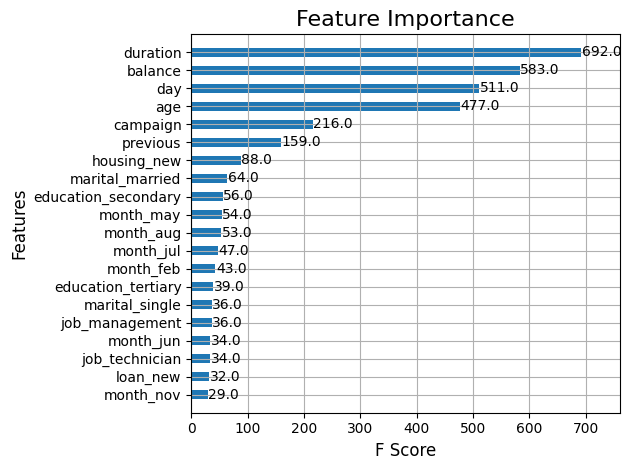

In [ ]:
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

# Initialize the XGBoost model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions on training data
y_train_pred = xgb_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Make predictions on testing data
y_test_pred = xgb_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Display training and testing accuracy
print(f"Training Accuracy: {(train_accuracy*100):.2f}%")
print(f"Testing Accuracy: {(test_accuracy*100):.2f}%")

# Detailed evaluation report on test set
print(classification_report(y_test, y_test_pred))

# Feature importance plot with larger figure size and spacing adjustments
plt.figure(figsize=(12, 8))  # Increase figure size to make the plot spacious
xgb.plot_importance(xgb_model, importance_type='weight', max_num_features=20, height=0.5)  # Adjust the height of bars
plt.title('Feature Importance', fontsize=16)
plt.xlabel('F Score', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()  # Automatically adjust subplots to fit into figure area
plt.show()

##Visualising

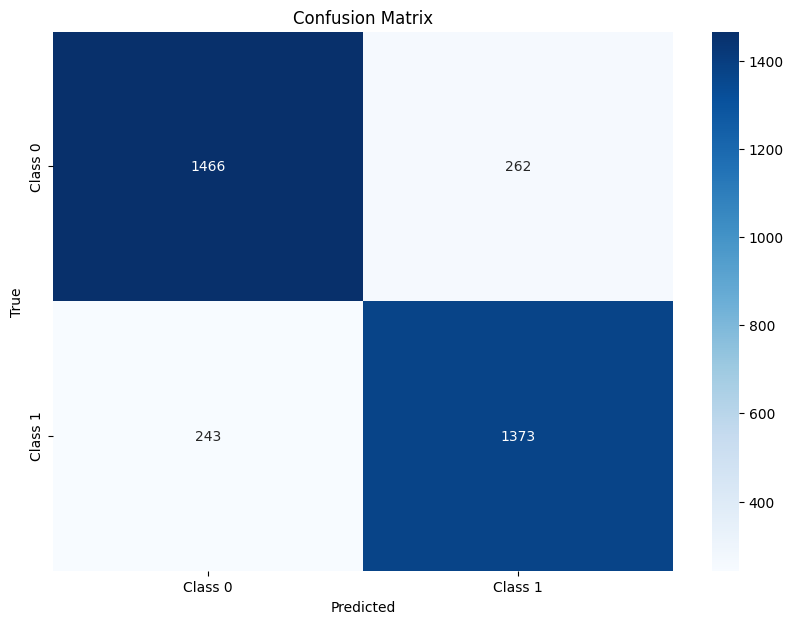

In [ ]:
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

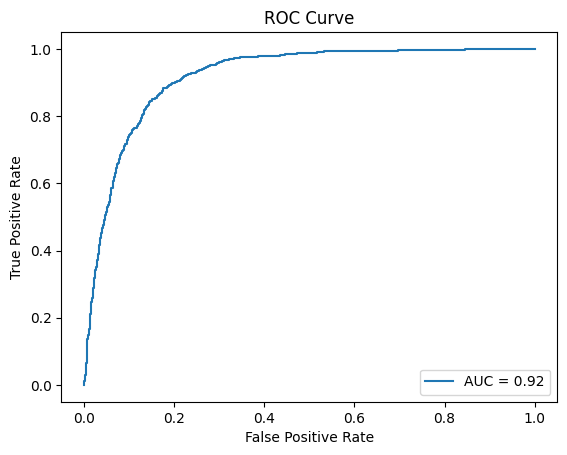

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Predict probabilities
y_test_pred_prob = xgb_model.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_prob)

# Compute AUC score
auc_score = roc_auc_score(y_test, y_test_pred_prob)

# Plot ROC curve
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

## Customer Response Distribution

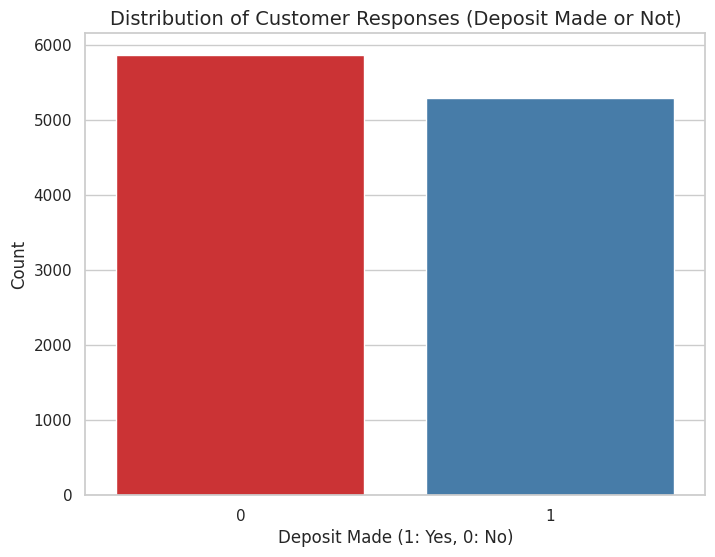

In [ ]:
sns.set(style="whitegrid")

# Plot the distribution of customer responses (deposit_new)
plt.figure(figsize=(8, 6))
sns.countplot(data=df1, x='deposit_new', palette='Set1')
plt.title('Distribution of Customer Responses (Deposit Made or Not)', fontsize=14)
plt.xlabel('Deposit Made (1: Yes, 0: No)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

## Age vs Response

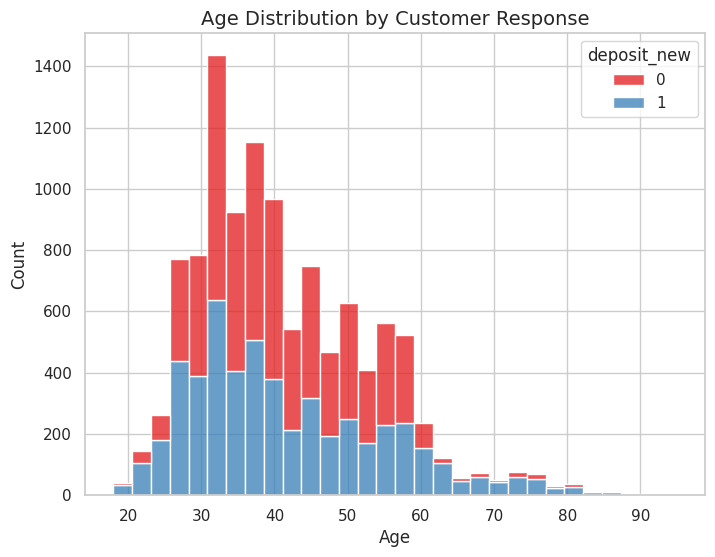

In [ ]:
# Plot Age vs Customer Response (deposit_new)
plt.figure(figsize=(8, 6))
sns.histplot(data=df1, x='age', hue='deposit_new', multiple='stack', palette='Set1', bins=30)
plt.title('Age Distribution by Customer Response', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

## Balance vs Response

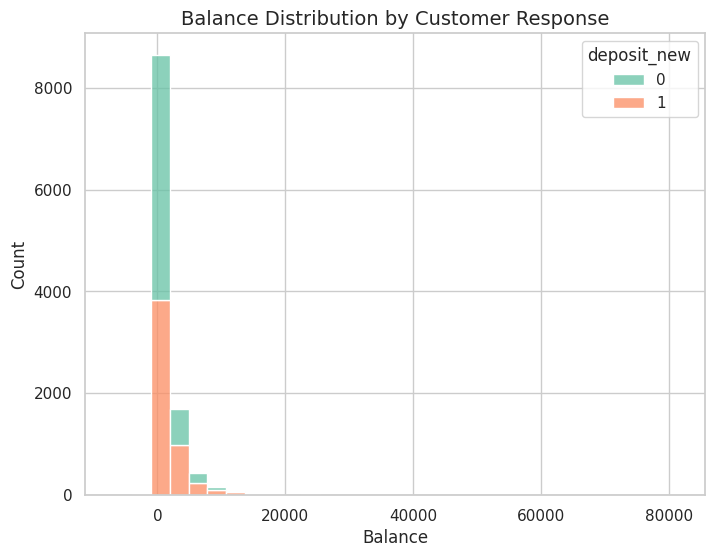

In [ ]:
# Plot Balance vs Customer Response (deposit_new)
plt.figure(figsize=(8, 6))
sns.histplot(data=df1, x='balance', hue='deposit_new', multiple='stack', palette='Set2', bins=30)
plt.title('Balance Distribution by Customer Response', fontsize=14)
plt.xlabel('Balance', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

## Duration vs Response

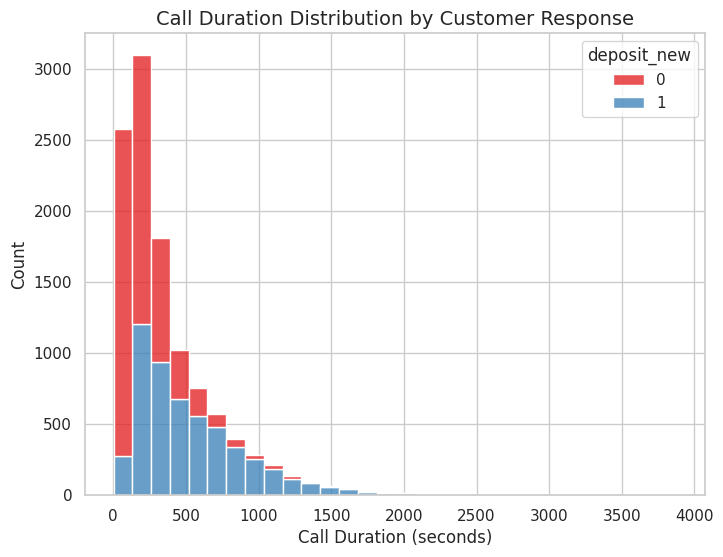

In [ ]:
# Plot Duration vs Customer Response
plt.figure(figsize=(8, 6))
sns.histplot(data=df1, x='duration', hue='deposit_new', multiple='stack', palette='Set1', bins=30)
plt.title('Call Duration Distribution by Customer Response', fontsize=14)
plt.xlabel('Call Duration (seconds)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

## Campaign Contacts vs Customer Responses

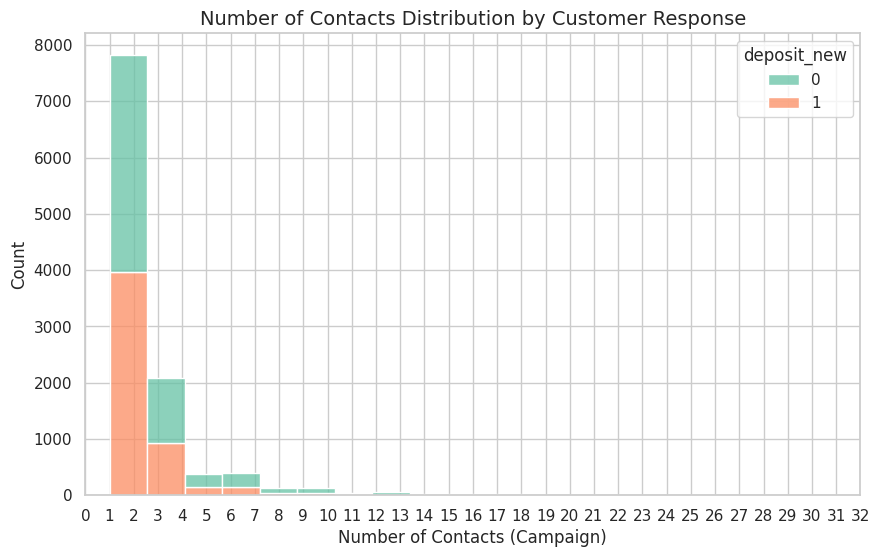

In [ ]:
# Plot Campaign Contacts vs Customer Response
plt.figure(figsize=(10, 6))  # Increased figure size for better visibility
sns.histplot(data=df1, x='campaign', hue='deposit_new', multiple='stack', palette='Set2', bins=20)  # Reduced number of bins for smoother plot
plt.title('Number of Contacts Distribution by Customer Response', fontsize=14)
plt.xlabel('Number of Contacts (Campaign)', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Set x-axis scale
plt.xticks(ticks=range(0, df1['campaign'].max() + 1, 1))  # Adjusting ticks for more frequent display
plt.xlim(0, df['campaign'].max())  # Setting x-axis limit to maximum value of campaign

plt.show()

## Day vs Response

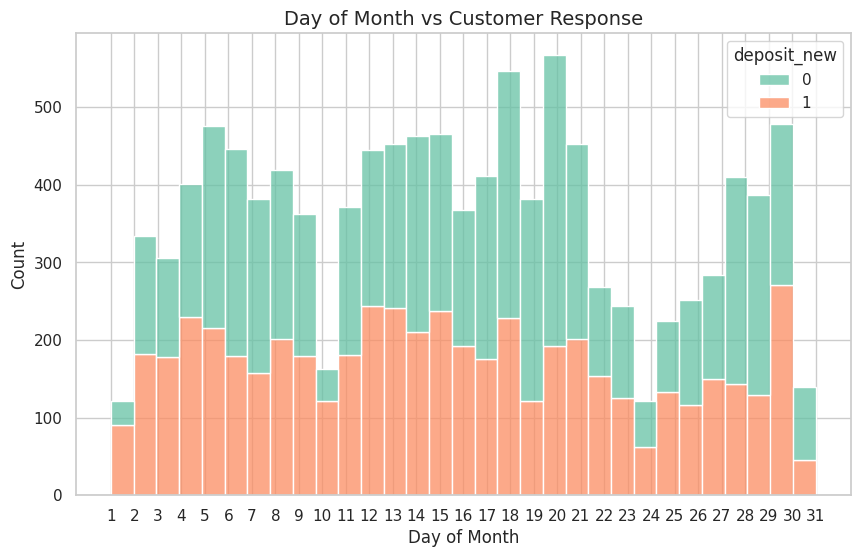

In [ ]:
# Plot Day vs Customer Response
plt.figure(figsize=(10, 6))
sns.histplot(data=df1, x='day', hue='deposit_new', multiple='stack', palette='Set2', bins=31)  # Bins for each day of the month
plt.title('Day of Month vs Customer Response', fontsize=14)
plt.xlabel('Day of Month', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(ticks=range(1, 32))  # Ensure ticks represent each day
plt.show()

## Housing vs Response

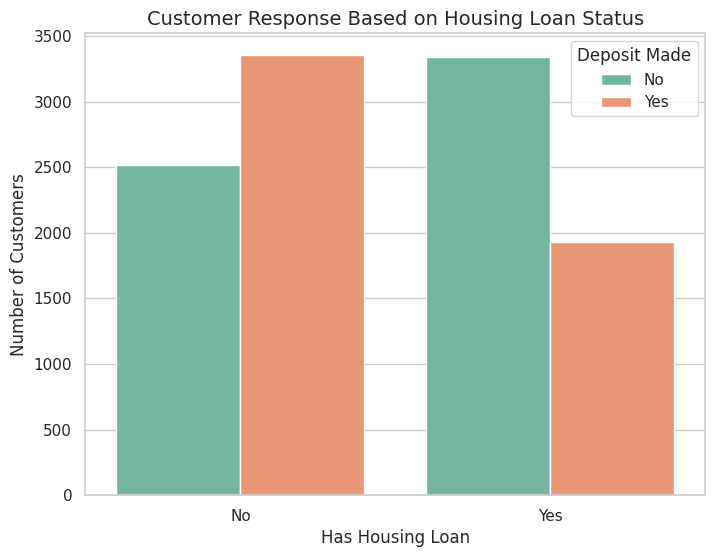

In [ ]:
# Plot Housing Loan vs Customer Response with improved readability
plt.figure(figsize=(8, 6))

# Use a countplot to show the relationship between housing loan and customer response
sns.countplot(data=df1, x='housing_new', hue='deposit_new', palette='Set2')

# Title and axis labels with clear explanations
plt.title('Customer Response Based on Housing Loan Status', fontsize=14)
plt.xlabel('Has Housing Loan', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)

# Customize x-tick labels to show "Yes" and "No" instead of 1 and 0
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])

# Add a legend to distinguish between responses
plt.legend(title='Deposit Made', loc='upper right', labels=['No', 'Yes'])

plt.show()

## Numerical Features


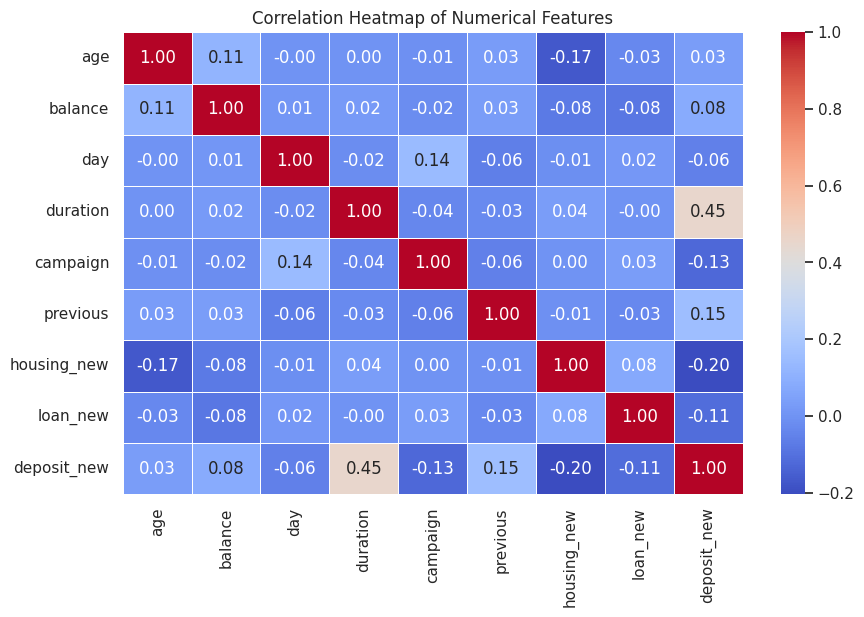

In [ ]:
# Correlation heatmap for numerical features
plt.figure(figsize=(10, 6))
corr = df1[['age', 'balance', 'day', 'duration', 'campaign', 'previous', 'housing_new', 'loan_new', 'deposit_new']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()